# EDA of NBA Active Players Data

#### Questions:
- What is the current player age distribution?
- At what age do players tend to "peak" statistically?
    - This can be broken down into pts, rbs, fg%, etc
    - Over time (both age and experience), how does performance change?
- What position performs the best? Do certain positions score/rebound/assist more than others?


#### Be Careful:
- If a player is in the NBA for a long time, they have performed well (and vice versa).
- Not every season has the same number of games played... (e.g. COVID year)

#### More Data?
- Height, weight, wingspan
- Right vs. Left shooter
- Draft info
- Salary
- Num injuries

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('nba.csv')

## Cleaning

In [3]:
# convert numerical fields to correct datatype
numeric_cols = [col for col in df.columns if col not in ['Name', 'Season', 'Tm', 'Lg', 'Pos']]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [4]:
# remove any obs of DID NOT PLAY
discard = ['Did Not Play']
df = df[df['Pos'].str.contains('|'.join(discard))==False]

In [5]:
# remove stats from current season
df = df[df['Season'].str.contains('2022-23')==False]

## Exploring

In [7]:
sns.set_style('darkgrid')

<AxesSubplot:xlabel='Age'>

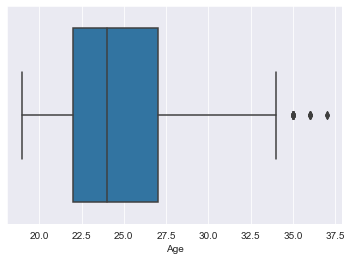

In [8]:
# age distribution
sns.boxplot(data=df, x='Age')

In [9]:
df['MP'].max()

39.6

In [10]:
# reduce df to players with 10+ yrs experience
experienced_players = df[df['Age'] >= 25]['Name'].unique()
ten = df[df['Name'].isin(experienced_players)]

# reduce df to seasons where player played at least 40 games
ten = ten[ten['G'] >= 40]

In [11]:
age = ten.groupby('Age')
age.mean()

age_df = age.mean().reset_index()

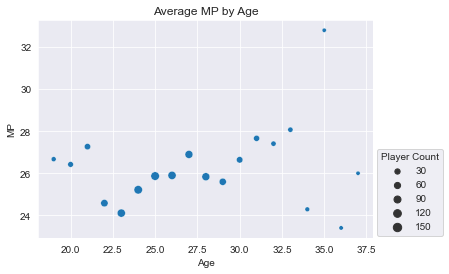

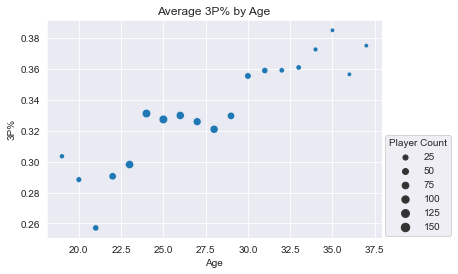

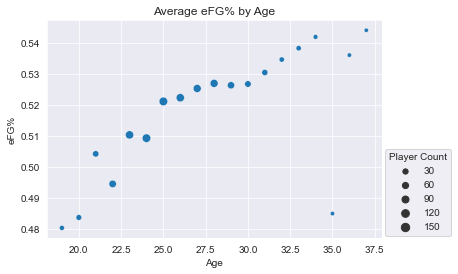

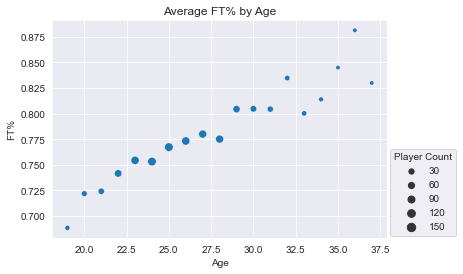

In [12]:
columns_of_interest = ['MP', '3P%', 'eFG%', 'FT%']

for col in columns_of_interest:

    temp_df = age.describe()[col][['count', 'mean']]

    sns.scatterplot(data=temp_df, x='Age', y='mean', size='count')

    plt.ylabel(col)
    
    plt.title('Average ' + col + ' by Age')

    plt.legend(title='Player Count', loc=(1.01,0.01))

    plt.show()

In [13]:
df.Pos.value_counts()
# very few are listed in multiple positions
# reduce to PG, SG, SF, PF, C
valid_pos = ['PG', 'SG', 'SF', 'PF', 'C']
pos = df[df['Pos'].isin(valid_pos)].groupby('Pos')
pos.mean().reset_index()

# make new pos df
pos_df = pos.mean().reset_index()
pos_df

,Pos,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Exp
0,C,24.841004,44.564854,24.803347,19.330544,3.457322,6.639331,0.513440,0.267782,0.840167,...,1.927197,4.346862,6.271967,1.208368,0.607113,0.889958,1.189540,2.117992,8.887029,5.606695
1,PF,25.106061,46.808081,24.969697,20.850505,3.692424,7.725758,0.462571,0.739899,2.139394,...,1.158081,3.672222,4.827273,1.397475,0.605051,0.593434,1.032323,1.832828,9.801515,5.777778
2,PG,25.477273,44.352273,23.810606,21.325379,3.351894,7.821970,0.405316,1.112121,3.082197,...,0.473485,2.119318,2.588636,3.468561,0.823106,0.207955,1.488258,1.667045,9.396970,5.840909
3,SF,25.195035,48.170213,28.375887,22.067376,3.373050,7.619149,0.424918,0.977305,2.821631,...,0.842908,2.985461,3.825887,1.641489,0.776596,0.382270,1.119504,1.700000,9.420567,6.251773
4,SG,24.596330,48.477064,23.437309,21.785015,3.645260,8.455963,0.415807,1.222630,3.422324,...,0.531498,2.327829,2.857187,1.969113,0.702446,0.231193,1.190826,1.623242,10.030275,5.116208


In [256]:
# columns_of_interest = ['PTS', 'TRB', 'AST', 'STL', 'BLK', '3PA', '3P%', 'eFG%', 'FT%']

# for col in columns_of_interest:
#     sns.barplot(data=pos_df, x='Pos', y=col, order=valid_pos)
#     plt.title('Average ' + col + ' by Position')
#     plt.show()

In [14]:
# let's try performance stats per minute rather than per game
df2 = df

columns_of_interest = ['PTS', 'TRB', 'AST', 'STL', 'BLK', '3PA']

for col in columns_of_interest:
    df2[col] = (df2[col] / df2['MP']) * 36

In [15]:
# reduce df to players with 10+ yrs experience
experienced_players = df2[df2['Age'] >= 25]['Name'].unique()
ten = df2[df2['Name'].isin(experienced_players)]

# reduce df to seasons where player played at least 40 games
ten = ten[ten['G'] >= 40]

In [16]:
age = ten.groupby('Age')
age.mean()

age_df = age.mean().reset_index()

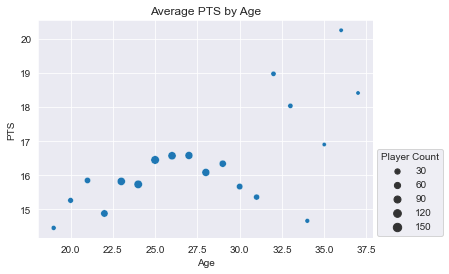

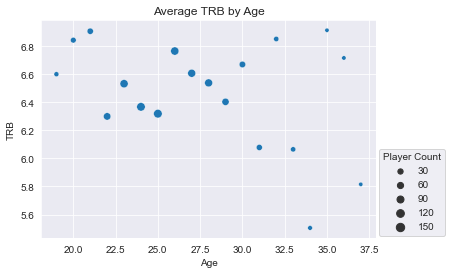

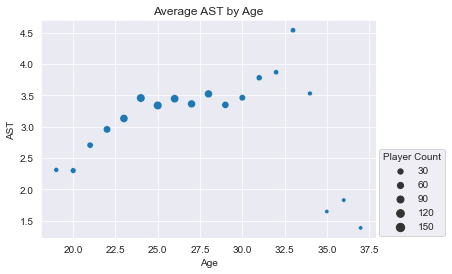

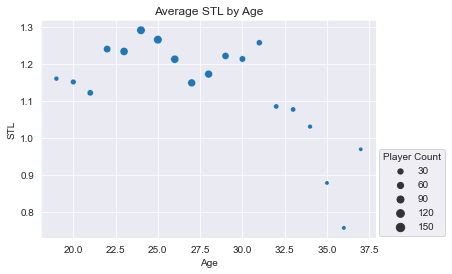

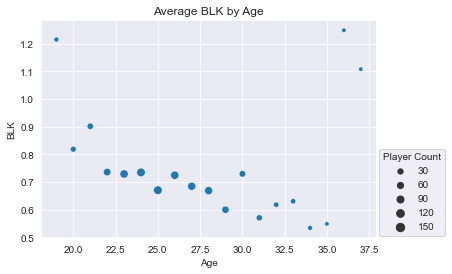

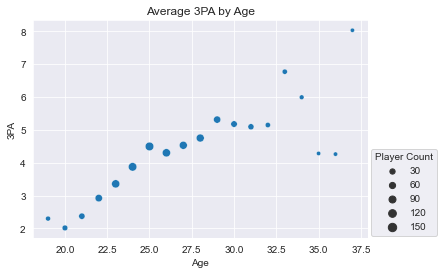

In [17]:
for col in columns_of_interest:
    
    temp_df = age.describe()[col][['count', 'mean']]

    sns.scatterplot(data=temp_df, x='Age', y='mean', size='count')

    plt.ylabel(col)
    
    plt.title('Average ' + col + ' by Age')

    plt.legend(title='Player Count', loc=(1.01,0.01))

    plt.show()